In [10]:
from sage.calculus.desolvers import desolve_system_rk4
from scipy.constants import hbar,pi,m_e,e

In [499]:
# constants

# ground and first exited state

q,E0,L = e,1e-11,3e-2

omega_21 = pi**2 * hbar * 3 / 2 / m_e / L**2

alpha = -q*E0*L**2 * 8 / 9 / pi**2

Omega = lambda det: sqrt(det**2 + alpha**2 / hbar**2)

print(omega_21,alpha,Omega(0))

1.90430128494705 -1.29867546368781e-34 1.23147180870669


In [500]:
# RWA probs

def prob_1(t,det):
    p1_1 = cos(Omega(det)*t/2)**2
    p1_2 = sin(Omega(det)*t/2)**2 * det**2 / Omega(det)**2
    
    return p1_1 + p1_2

def prob_2(t,det):
    
    return sin(Omega(det)*t/2)**2 * alpha**2 / (hbar**2 * Omega(det)**2)

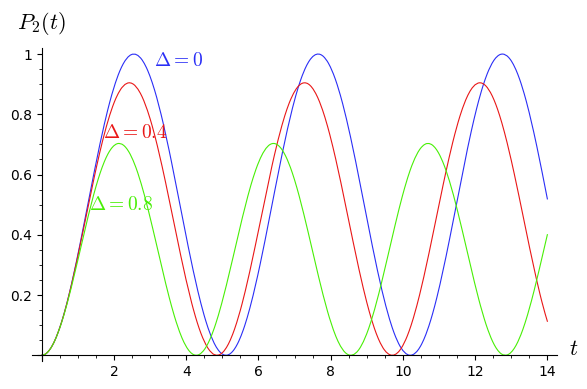

In [501]:
t = var('t')

n = 14

p1 = plot(prob_2(t,0),(t,0,n),color='#2a2ef6',thickness=0.8)
p2 = plot(prob_2(t,0.4),(t,0,n),color='#e91717',thickness=0.8)
p3 = plot(prob_2(t,0.8),(t,0,n),color='#48ef06',axes_labels=['$t$','$P_2(t)$'],thickness=0.8)#,frame=True,axes=False)

t1 = text(r'$ \Delta = 0$', (3.8, 0.98),fontsize=14,color='#2a2ef6')
t2 = text(r'$ \Delta = 0.4$', (2.6, 0.74),fontsize=14,color='#e91717')
t3 = text(r'$ \Delta = 0.8$', (2.2, 0.5),fontsize=14,color='#48ef06')

show(p1+p2+p3+t1+t2+t3)

# show(p1+p2+p3)

In [502]:
# non-RWA coupled system

omega_0 = omega_21

def a1_dot(a1,b1,a2,b2,t):
    t1 = cos(omega*t)*cos(omega_0*t)*b2
    t2 = -cos(omega*t)*sin(omega_0*t)*a2
    
    return (t1 + t2)*alpha/hbar

def b1_dot(a1,b1,a2,b2,t):
    t1 = -cos(omega*t)*cos(omega_0*t)*a2
    t2 = -cos(omega*t)*sin(omega_0*t)*b2
    
    return (t1 + t2)*alpha/hbar

def a2_dot(a1,b1,a2,b2,t):
    t1 = cos(omega*t)*cos(omega_0*t)*b1
    t2 = cos(omega*t)*sin(omega_0*t)*a1
    
    return (t1 + t2)*alpha/hbar

def b2_dot(a1,b1,a2,b2,t):
    t1 = -cos(omega*t)*cos(omega_0*t)*a1
    t2 = cos(omega*t)*sin(omega_0*t)*b1
    
    return (t1 + t2)*alpha/hbar

In [503]:
# nRWA integration

a1,b1,a2,b2,t = var('a1 b1 a2 b2 t')

omega_0 = omega_21

omega = omega_21

T_int = 14

P_d0 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_21 + 0.4

P_d04 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_21 + 0.8

P_d08 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_21 + 2

P_d2 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

In [504]:
P1_d0, P2_d0 = [],[]
P1_d04, P2_d04 = [],[]
P1_d08, P2_d08 = [],[]
P1_d2, P2_d2 = [],[]

t_steps = [0]

for lst in P_d0:
    P1_d0.append(lst[1]**2+lst[2]**2)
    P2_d0.append(lst[3]**2+lst[4]**2)
    t_steps.append(t_steps[-1] + 0.05)
    
for lst in P_d04:
    P1_d04.append(lst[1]**2+lst[2]**2)
    P2_d04.append(lst[3]**2+lst[4]**2)
    
for lst in P_d08:
    P1_d08.append(lst[1]**2+lst[2]**2)
    P2_d08.append(lst[3]**2+lst[4]**2)
    
for lst in P_d2:
    P1_d2.append(lst[1]**2+lst[2]**2)
    P2_d2.append(lst[3]**2+lst[4]**2)

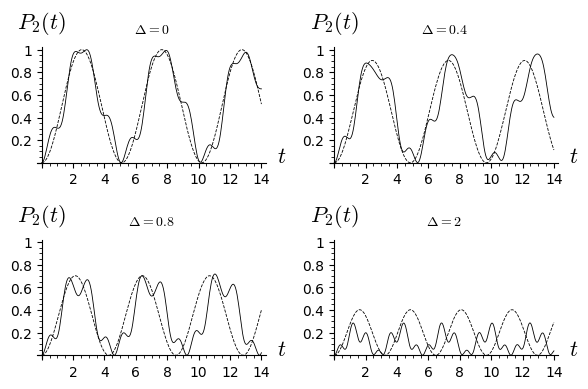

In [505]:
P2_rk4_d0 = list_plot(list(zip(t_steps,P2_d0)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d0 = plot(prob_2(t,0),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d04 = list_plot(list(zip(t_steps,P2_d04)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d04 = plot(prob_2(t,0.4),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0.4$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d08 = list_plot(list(zip(t_steps,P2_d08)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d08 = plot(prob_2(t,0.8),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0.8$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d2 = list_plot(list(zip(t_steps,P2_d2)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d2 = plot(prob_2(t,1.5),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 2$',axes_labels=['$t$','$P_2(t)$'])

plot_d0 = P2_rwk_d0+P2_rk4_d0
plot_d04 = P2_rwk_d04+P2_rk4_d04
plot_d08 = P2_rwk_d08+P2_rk4_d08
plot_d2 = P2_rwk_d2+P2_rk4_d2

GraphicsArray = graphics_array([[plot_d0,plot_d04],[plot_d08,plot_d2]])

GraphicsArray.show()

In [533]:
# constants

# 3rd and 4th exited states

q,E0,L = e,1e-11,3e-2

omega_54 = pi**2 * hbar * 5 / 2 / m_e / L**2

alpha = -q*E0*L**2 * 48 / 49 / pi**2

Omega = lambda det: sqrt(det**2 + alpha**2 / hbar**2)

print(omega_54,alpha,Omega(0))

3.17383547491175 -1.43119336814575e-34 1.35713219735023


In [534]:
# nRWA integration

a1,b1,a2,b2,t = var('a1 b1 a2 b2 t')

omega_0 = omega_54

omega = omega_54

T_int = 14

P_d0 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_54 + 0.4

P_d04 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_54 + 0.8

P_d08 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

omega = omega_54 + 2

P_d2 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,T_int],step=0.05)

In [535]:
P1_d0, P2_d0 = [],[]
P1_d04, P2_d04 = [],[]
P1_d08, P2_d08 = [],[]
P1_d2, P2_d2 = [],[]

t_steps = [0]

for lst in P_d0:
    P1_d0.append(lst[1]**2+lst[2]**2)
    P2_d0.append(lst[3]**2+lst[4]**2)
    t_steps.append(t_steps[-1] + 0.05)
    
for lst in P_d04:
    P1_d04.append(lst[1]**2+lst[2]**2)
    P2_d04.append(lst[3]**2+lst[4]**2)
    
for lst in P_d08:
    P1_d08.append(lst[1]**2+lst[2]**2)
    P2_d08.append(lst[3]**2+lst[4]**2)
    
for lst in P_d2:
    P1_d2.append(lst[1]**2+lst[2]**2)
    P2_d2.append(lst[3]**2+lst[4]**2)

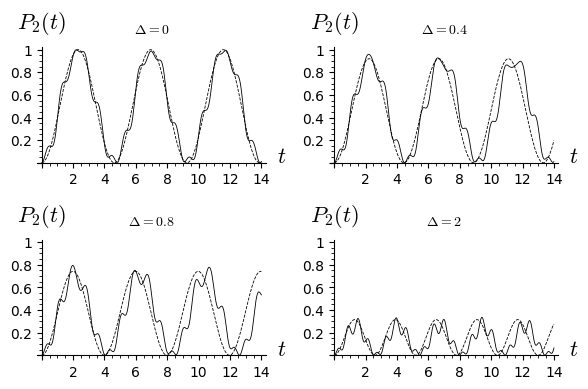

In [536]:
P2_rk4_d0 = list_plot(list(zip(t_steps,P2_d0)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d0 = plot(prob_2(t,0),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d04 = list_plot(list(zip(t_steps,P2_d04)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d04 = plot(prob_2(t,0.4),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0.4$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d08 = list_plot(list(zip(t_steps,P2_d08)),plotjoined=True,color='#000000',thickness=0.6,\
                     ymin=0,ymax=1)
P2_rwk_d08 = plot(prob_2(t,0.8),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 0.8$',axes_labels=['$t$','$P_2(t)$'])

P2_rk4_d2 = list_plot(list(zip(t_steps,P2_d2)),plotjoined=True,color='#000000',thickness=0.6,\
                    ymin=0,ymax=1)
P2_rwk_d2 = plot(prob_2(t,2),(t,0,T_int),color='#000000',linestyle='--',thickness=0.6,\
                     ymin=0,ymax=1,title=r'$\Delta = 2$',axes_labels=['$t$','$P_2(t)$'])

plot_d0 = P2_rwk_d0+P2_rk4_d0
plot_d04 = P2_rwk_d04+P2_rk4_d04
plot_d08 = P2_rwk_d08+P2_rk4_d08
plot_d2 = P2_rwk_d2+P2_rk4_d2

GraphicsArray = graphics_array([[plot_d0,plot_d04],[plot_d08,plot_d2]])

GraphicsArray.show()